## Bayesian Statistics

In the Bayesian framework, the probability is defined as the measure of belief in an event occurring. We naturally use our beliefs as a probability of an event. Our belief in a hypothesis after taking data is proportional to how well that hypothesis explains the data times our prior belief.  

\begin{equation*}
P(hypothesis|data)\propto P(data|hypothesis) P(hypothesis)
\end{equation*}

P(hypothesis|data): Posterior probability  
P(data|hypothesis): Likelihood function  
P(hypothesis): Prior probability  

Example: Daniel Kahneman has an interesting example in his book. Steve has been described by his neighbor as follows: “*Steve is very shy and withdrawn, helpful but with very little interest in people or in the world of reality. He has a need for order and structure, and a passion for detail.*” Is Steve more likely to be a librarian or a farmer?  

At first glance, it seems that Steve is more likely to be a librarian. Are we missing something? Yes, we are missing prior belief (background information). In the United States, the ratio of male farmers to male librarians is about 20 to 1. How can we incorporate this background information in our belief? If we have no information from his neighbor, then the probability of being a librarian is $\frac{1}{21}$. So, Prior probability=P(Steve is a librarian)$=\frac{1}{21}$. Now, we are given information from the neighbor. The probability of his neighbor's description given that Steve is a librarian shows the likelihood function. Let's consider that we are 90% confident that the neighbor describes Steve in that way if he is a librarian. So, P(neighbor info|Steve is a librarian)$=0.9$.



<div align="center">P(Steve is a librarian|neighbor info)$\propto$ P(neighbor info|Steve is a librarian) P(Steve is a librarian)</div>

Posterior probability on the left-hand side of the equation should be normalized ($0\leq P\leq 1$), so:


<div align="center">$P(\text{Steve is a librarian|neighbor info})= \frac{P(\text{neighbor info|Steve is a librarian})P(\text{Steve is a librarian})}{P(\text{neighbor info|Steve is a librarian})P(\text{Steve is a librarian})+P(\text{neighbor info|Steve is a farmer})P(\text{Steve is a farmer})}$</div>



Let's consider that P(neighbor info|Steve is a farmer)$=0.5$
<div align="center">$P(\text{Steve is a librarian|neighbor info})= \frac{0.9\times\frac{1}{21}}{0.9\times\frac{1}{21}+0.5\times \frac{20}{21}}=8.2\%$</div>

Now, let's look into another example:

In [1]:
import numpy as np
import matplotlib.pylab as plt

Poisson distribution:
<div align="center"> $P(k;\lambda)=\frac{\lambda^k e^{-\lambda}}{k!}$</div>

Create random numbers with Poisson distribution:

In [2]:
t=np.random.poisson(10,100000)

In [3]:
Poisson=lambda k,λ: (λ**k)*np.exp(-λ)/np.math.factorial(k)

In [4]:
Poisson=np.vectorize(Poisson)

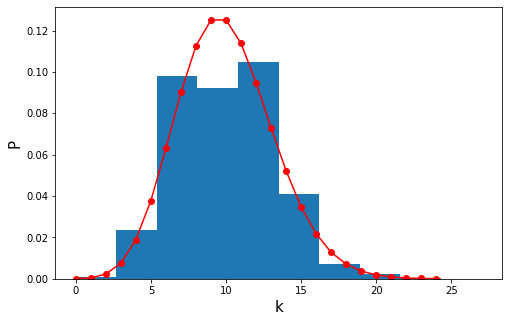

In [5]:
plt.figure(figsize=(8,5))

plt.hist(t, density=True)
plt.plot(np.arange(25),Poisson(np.arange(25),10),c='r', marker='o')

plt.ylabel('P',fontsize=15)
plt.xlabel('k', fontsize=15)
plt.show()


What is the average of k? We know that the expected value of k with Poisson distribution is λ

In [6]:
np.mean(t)

10.01728

Now, let's generate a fake set of data as a tweet counts (similar to what you have in the second HW)

In [7]:
tweet=np.random.poisson(50,52)

Text(0.5, 1.0, 'Weekly tweet counts')

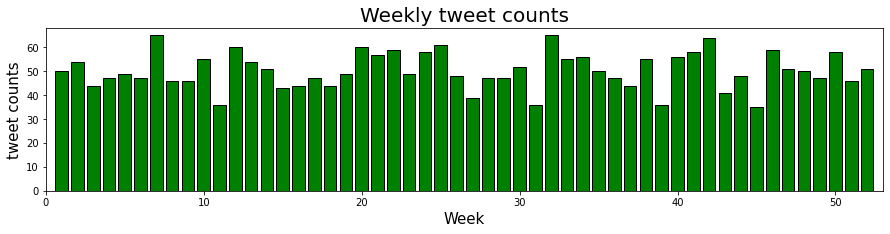

In [8]:
plt.figure(figsize=(15,3))
plt.bar(np.arange(1,53),tweet, color='green',edgecolor='black')
plt.xlim(0,53)
plt.xlabel('Week',fontsize=15)
plt.ylabel('tweet counts',fontsize=15)

plt.title('Weekly tweet counts', fontsize=20)

The data have been generated from the Poisson distribution with λ=50. Imagine that we don't know underlying distribution and we want to estimate λ

Consider that the weekly tweet counts are drawn from Poisson distribution with unknown λ. Do we have any prior belief on λ?

Exponential random distribution

<div align="center">$P(\lambda;\alpha)=\alpha e^{-\lambda\alpha}$</div>

In [9]:
Exponential=lambda λ,α: α*np.exp(-λ*α)
Exponential=np.vectorize(Exponential)

Assume that a normal person tweets 25 tweets per week ($\alpha=1/25=0.04$)

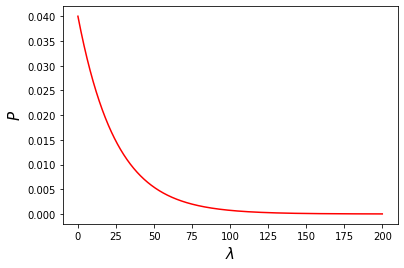

In [16]:
plt.plot(np.linspace(0,200,1000),Exponential(np.linspace(0,200,1000),0.04),c='r')
plt.xlabel('$\lambda$', fontsize=15)
plt.ylabel('$P$', fontsize=15)
plt.show()

Let's make a grid for λ and find posterior of every single point

In [17]:
λ_est=np.linspace(40,60,2000)

In [23]:
def Posterior_tweet(λ_est,tweet_Data):
    return np.prod(Poisson(tweet_Data,λ_est)*Exponential(λ_est,0.04))

In [24]:
P_=np.array([])
for j in λ_est:
    P_=np.append(P_,Posterior_tweet(j,tweet))

In [25]:
Posterior=P_/np.trapz(P_,λ_est)

In [26]:
λ_mode=λ_est[np.argmax(Posterior)]
λ_mode

48.37418709354677

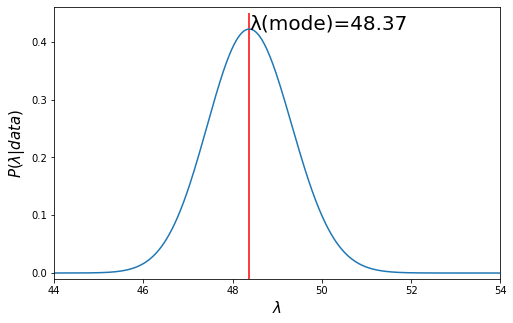

In [29]:
plt.figure(figsize=(8,5))
plt.plot(λ_est,Posterior)
plt.vlines(λ_mode,-0.01,0.45,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.ylim(-0.01,0.46)
plt.xlim(44,54)
plt.text(λ_mode,np.max(Posterior),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.show()

How to define confidence inteval? Consider that the posterior is a symmetric distribution with no skew.

<div align="center">Expected value of $x=\bar{x}=\int x P(x) dx$</div>

In [30]:
μ=np.trapz(λ_est*Posterior,λ_est)
μ

48.39127218934911

<div align="center">Variance of $x=\int (x-\bar{x})^2 P(x) dx$</div>

In [31]:
σ=np.sqrt(np.trapz(((λ_est-μ)**2)*Posterior,λ_est))
σ

0.9459434587595165

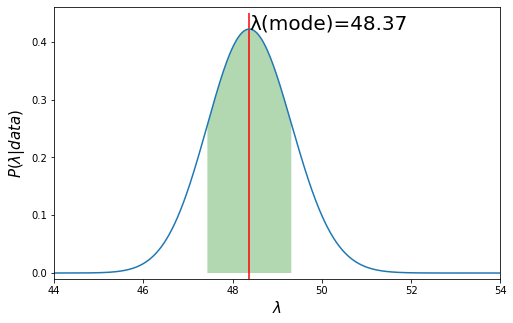

In [32]:
plt.figure(figsize=(8,5))
plt.plot(λ_est,Posterior)
plt.vlines(λ_mode,-0.01,0.45,color='red')
plt.xlabel('$\lambda$',fontsize=15)
plt.ylabel('$P(λ|data)$',fontsize=15)
plt.ylim(-0.01,0.46)
plt.xlim(44,54)
plt.text(λ_mode,np.max(Posterior),'λ(mode)={:0.2f}'.format(λ_mode),fontsize=20)
plt.fill_between(λ_est,Posterior,where=[(x>=(λ_mode-σ))&(x<=(λ_mode+σ)) for x in λ_est],facecolor='green',alpha=0.3)
plt.show()

Find the area of the green region

In [33]:
mask=(λ_est>=(λ_mode-σ))&(λ_est<=(λ_mode+σ))

In [34]:
np.trapz(Posterior[mask],λ_est[mask])

0.6799428268749993

So, we are 68% confident that λ is between 47.4 and 49.4.